# Programming Assignment 1 - OpenCV Exercises Image Enhancement

by Mark Jeremy G. Narag

This Programming Assignment has seven (7) parts which tackles 7 different tasks. This is PART 7.


All codes were executed using Jupyter Notebook in Macbook Air M1 MacOS Ventura 13.4.1

## PART 7: Translation and Rotation Properties of the 2D Fourier Transform
The translation property of the Fourier Transform is described by the following:

$$F[f(x − x_0, y − y_0)] = F(u, v)e^{−j2π(ux_0+vy_0)/M)} $$

$$f(x − x_0, y − y_0) = F^{−1}[F(u, v)e^{j2π(ux_0+vy_0)/M} ]$$

i.e., if the image is moved, the resulting spectrum undergoes a phase shift but the magnitude remains the same.

Rotation property is better illustrated using polar coordinates:
$$r = xcos(θ) c = ysin(θ)$$
$$u = ωcos(α) v = ωsin(α) $$
The Fourier Transform pair f(x,y) and F(u,v) are thus written as f(x,θ) and F(ω,α) respectively.
The follow property now becomes obvious:
$$f(x, θ + θ_0) = F^{−1}[F(ω, α + θ_0)]$$
$$F[f(x, θ + θ_0)] = F(ω, α + θ_0)$$
i.e. if an image is rotated by an angle θ0, then F(u, v) is rotated by the same angle and vice versa.



Verify the above properties on the cameraman images (cameraman1.jpg to cameraman4.jpg). You must display the magnitude and phase of the Fourier spectrum of each. Compare them with the original image (cameraman1.jpg).

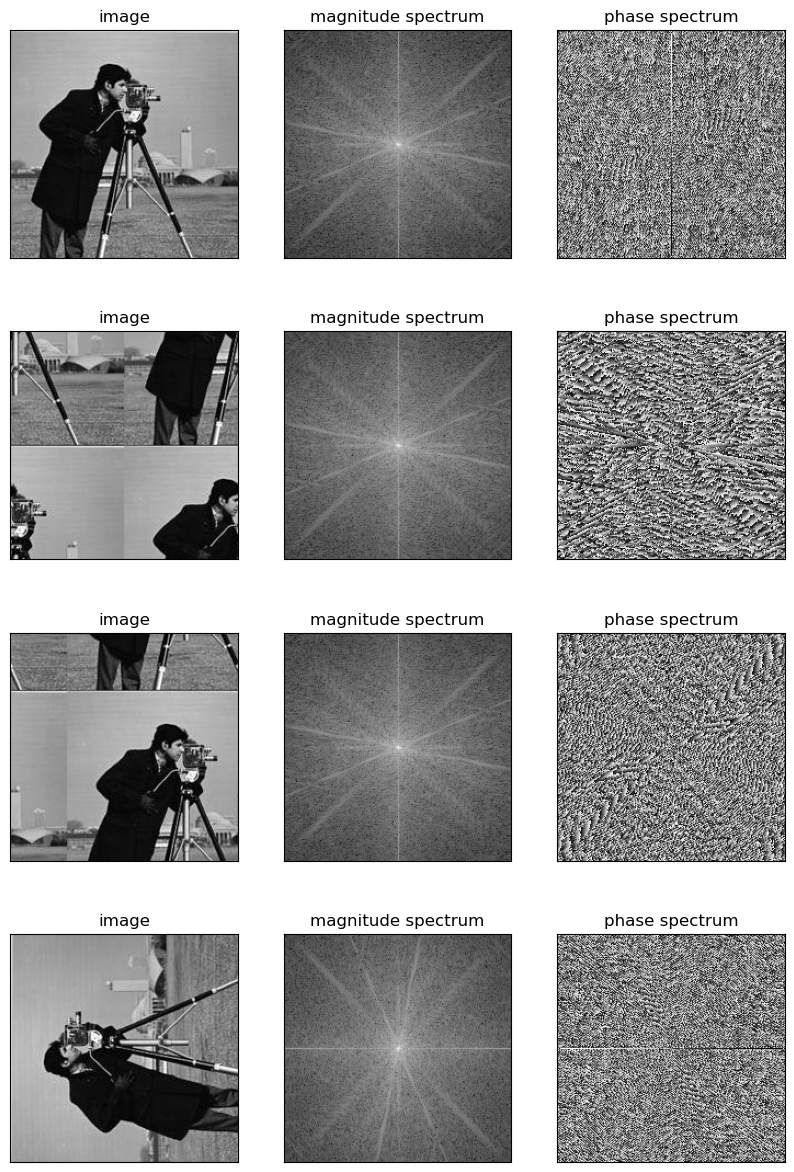

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def FFT(image):
    f_transform = np.fft.fft2(image) # applying FFT to the image. Note that it is fft2 since image is 2D.
    # we then shift the zero frequency component to the center of the spectrum:
    f_transform_shifted = np.fft.fftshift(f_transform)
    
    # Then we compute the magnitude spectrum:
    # np.abs() calculates the magnitude of complex numbers
    # we add +1 to avoid taking the logarithm of zero or very small values
    # we apply np.log() to make it more suitable for visualization
    magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)
    
    #Last, we compute the phase spectrum
    phase_spectrum = np.angle(f_transform_shifted)
    return magnitude_spectrum, phase_spectrum



plt.figure(figsize = (10,15))
image = cv2.imread('cameraman1.jpg', cv2.IMREAD_GRAYSCALE)
plt.subplot(431)
plt.imshow(image, cmap='gray')
plt.title('image'), plt.xticks([]), plt.yticks([])

plt.subplot(432)
plt.imshow(FFT(image)[0], cmap='gray')
plt.title('magnitude spectrum'), plt.xticks([]), plt.yticks([])

plt.subplot(433)
plt.imshow(FFT(image)[1], cmap='gray')
plt.title('phase spectrum'), plt.xticks([]), plt.yticks([])

image = cv2.imread('cameraman2.jpg', cv2.IMREAD_GRAYSCALE)
plt.subplot(434)
plt.imshow(image, cmap='gray')
plt.title('image'), plt.xticks([]), plt.yticks([])

plt.subplot(435)
plt.imshow(FFT(image)[0], cmap='gray')
plt.title('magnitude spectrum'), plt.xticks([]), plt.yticks([])

plt.subplot(436)
plt.imshow(FFT(image)[1], cmap='gray')
plt.title('phase spectrum'), plt.xticks([]), plt.yticks([])

image = cv2.imread('cameraman3.jpg', cv2.IMREAD_GRAYSCALE)
plt.subplot(437)
plt.imshow(image, cmap='gray')
plt.title('image'), plt.xticks([]), plt.yticks([])

plt.subplot(438)
plt.imshow(FFT(image)[0], cmap='gray')
plt.title('magnitude spectrum'), plt.xticks([]), plt.yticks([])

plt.subplot(439)
plt.imshow(FFT(image)[1], cmap='gray')
plt.title('phase spectrum'), plt.xticks([]), plt.yticks([])

image = cv2.imread('cameraman4.jpg', cv2.IMREAD_GRAYSCALE)
plt.subplot(4,3,10)
plt.imshow(image, cmap='gray')
plt.title('image'), plt.xticks([]), plt.yticks([])

plt.subplot(4,3,11)
plt.imshow(FFT(image)[0], cmap='gray')
plt.title('magnitude spectrum'), plt.xticks([]), plt.yticks([])

plt.subplot(4,3,12)
plt.imshow(FFT(image)[1], cmap='gray')
plt.title('phase spectrum'), plt.xticks([]), plt.yticks([])

#plt.savefig('part7.png')
plt.show()



As we can see, the magnitude spectrum did not change in cameraman 2 and 3 even though the image seems to be jumbled. This is because the rearrangement of pixels does not alter the underlying spatial frequency content of the image. It simply changes the spatial arrangement of the data. The phase spectrum changes however. 

In cameraman 4, since we rotated the image, the magnitude and phase spectrum also rotated with respect to cameraman1. Remember that in the frequency domain, the magnitude of the FFT represents the amplitude or strength of different spatial frequencies. We can consider these frequencies as "gradients" or variations in pixel values in different directions (horizontal, vertical). Thus, when you rotate an image, the spatial frequencies change orientation because the original horizontal and vertical components become oblique in the rotated image. This change in orientation of the spatial frequencies results in a corresponding rotation of the magnitude spectrum.